In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [192]:
df = pd.read_csv("HW3Data.csv")
corn=df['Days_Corn'].to_numpy()
cotton = df['Days_Cotton'].to_numpy()
Corn_NDVI_2013 = df['Corn_NDVI_2013'].to_numpy()
Cotton_NDVI_2013 = df['Cotton_NDVI_2013'].to_numpy()

df.head(3)

,Days_Corn,Days_Cotton,Corn_NDVI_2013,Cotton_NDVI_2013,Corn_MSAVI_2013,Cotton_MSAVI_2013,Corn_EVI_2013,Cotton_EVI_2013,Corn_NDVI_2014,Cotton_NDVI_2014,Corn_MSAVI_2014,Cotton_MSAVI_2014,Corn_EVI_2014,Cotton_EVI_2014
0,195,173,0.220787,0.266734,0.138773,0.171675,0.136321,0.168227,0.267668,0.304886,0.169187,0.197476,0.168276,0.195093
1,196,174,0.236955,0.275388,0.147700,0.178417,0.145747,0.175212,0.283176,0.314678,0.179115,0.203764,0.178832,0.201546
2,197,175,0.253122,0.284041,0.156627,0.185160,0.155173,0.182198,0.298683,0.324470,0.189043,0.210052,0.189389,0.207999


### 1) Fit curves to corn and cotton NDVI vs days. In 2013.

In [219]:
corn_b = np.c_[np.ones((40, 1)), Corn_NDVI_2013] # add x0 = 1 to each instance
cotton_b = np.c_[np.ones((40, 1)), Cotton_NDVI_2013] # add x0 = 1 to each instance

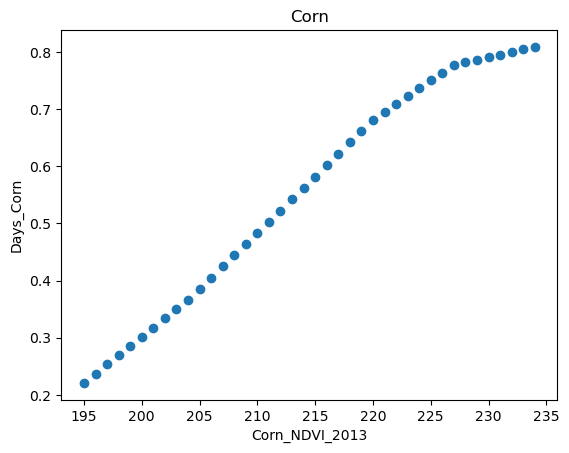

In [220]:
%matplotlib inline
plt.ylabel('Days_Corn')
plt.xlabel('Corn_NDVI_2013')
plt.title("Corn")
plt.scatter(df[['Days_Corn']],df[['Corn_NDVI_2013']])

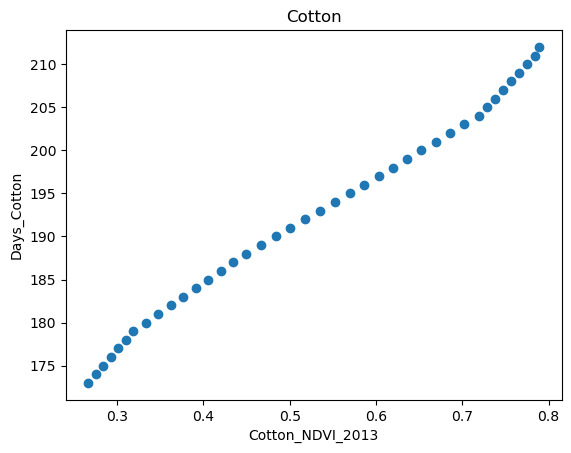

In [221]:
%matplotlib inline
plt.ylabel('Days_Cotton')
plt.xlabel('Cotton_NDVI_2013')
plt.title("Cotton")
plt.scatter(df[['Cotton_NDVI_2013']],df[['Days_Cotton']])

MSE REFERENCE
https://www.educative.io/answers/calculating-mean-squared-error-in-python

In [222]:
def calculateMSE(y,y_bar):
    summation = 0  #variable to store the summation of differences
    n = len(y) #finding total number of items in list
    for i in range (0,n):  #looping through each element of the list
      difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
      squared_difference = difference**2  #taking square of the differene 
      summation = summation + squared_difference  #taking a sum of all the differences
    MSE = summation/n  #dividing summation by total values to obtain average
    print ("The Mean Square Error is: " , MSE)
    return MSE;

In [223]:
normal_equation_errors = {
    "corn":0,
    "cotton":0,
}
linear_regression_errors={
    "corn":0,
    "cotton":0,
}

## 1.1) Normal Equation
Now, let's compute w_estimate using Normal Equation (equivalent of fit in SciKit-Learn)

In [227]:
w_estimate = np.linalg.inv(corn_b.T.dot(corn_b)).dot(corn_b.T).dot(corn)     # fit

In [228]:
w_estimate

array([181.55141003,  59.39352955])

In [229]:
x_new = np.array([[0], [3]])
x_new

array([[0],
       [3]])

In [230]:
x_new_b = np.c_[np.ones((2, 1)), x_new] # add x0 = 1 to each instance
x_new_b

array([[1., 0.],
       [1., 3.]])

In [231]:
y_predict = x_new_b.dot(w_estimate)          # predict
y_predict

array([181.55141003, 359.73199869])

## Get predictions and find normal equation error
w_estimate[0] + x * w_estimate[1]

In [232]:
y_bar = [];
for item in corn:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['corn'] = calculateMSE(corn,y_bar)


The Mean Square Error is:  161921277.78666657


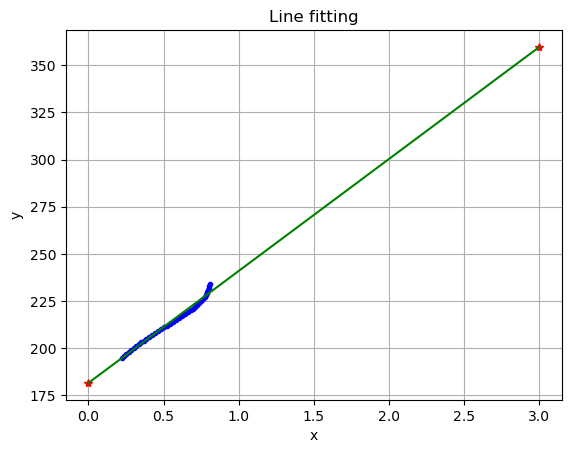

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Corn_NDVI_2013,corn, "b.")
plt.plot(x_new, y_predict, "r*")
plt.plot(x_new, y_predict, "g-")
plt.grid()
plt.title("Line fitting")
plt.xlabel("x")
plt.ylabel("y");

In [63]:
y_bar = [];
for item in Corn_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['corn'] = calculateMSE(corn,y_bar)

The Mean Square Error is:  2.058913119486288


In [64]:
w_estimate = np.linalg.inv(cotton_b.T.dot(cotton_b)).dot(cotton_b.T).dot(cotton)     # fit
y_predict = x_new_b.dot(w_estimate)  
w_estimate

array([156.93048063,  67.26357487])

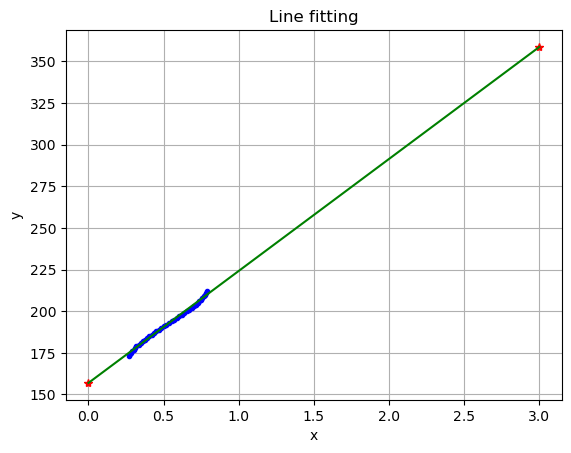

In [65]:

%matplotlib inline

plt.plot(Cotton_NDVI_2013,cotton, "b.")
plt.plot(x_new, y_predict, "r*")
plt.plot(x_new, y_predict, "g-")
plt.grid()
plt.title("Line fitting")
plt.xlabel("x")
plt.ylabel("y");

In [66]:
y_bar = [];
for item in Cotton_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['cotton'] = calculateMSE(cotton,y_bar)

The Mean Square Error is:  0.7229077337074801


## 1.2) Linear Regression

In [67]:
reg_corn = linear_model.LinearRegression()
reg_cotton = linear_model.LinearRegression()

In [68]:
reg_corn.fit(df[['Corn_NDVI_2013']].values,df['Days_Corn'].values)       # train the linear regression data 
reg_cotton.fit(df[['Cotton_NDVI_2013']].values,df['Days_Cotton'].values,) # train the linear regression data 
print(type(df[['Days_Corn']].values))

<class 'numpy.ndarray'>


In [69]:
reg_corn.predict([[0.3]])

array([199.3694689])

In [70]:
reg_cotton.predict([[0.27]])

array([175.09164585])

## y = mx + b 

In [71]:
reg_corn.coef_             #returns m

array([59.39352955])

In [72]:
reg_corn.intercept_        #returns b

181.55141003210332

In [73]:
reg_cotton.coef_           #returns m

array([67.26357487])

In [74]:
reg_cotton.intercept_      #returns b

156.93048063211285

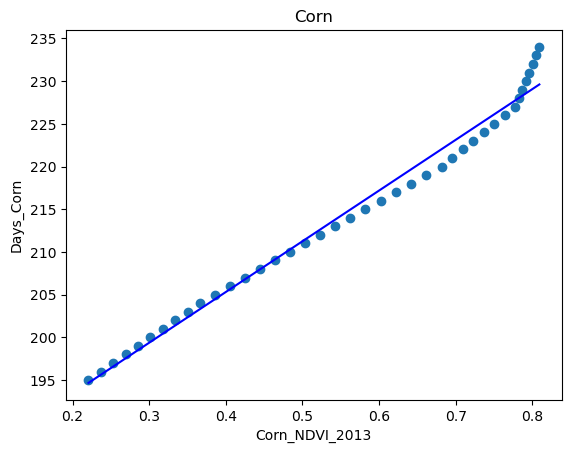

In [75]:
%matplotlib inline
plt.ylabel('Days_Corn',fontsize=10)
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Days_Corn)
plt.title("Corn")
plt.plot(df.Corn_NDVI_2013,reg_corn.predict(df[['Corn_NDVI_2013']].values),color='blue')

In [79]:
from itertools import chain
y_bar = []
items = [];
y = df[['Corn_NDVI_2013']].to_numpy()
y = y.flatten() #covert 2d to 1d
for item in y:
    y_bar.append(reg_corn.predict([[item]]))

y_bar = list(chain.from_iterable(y_bar)) #covert 2d to 1d
y_bar = np.array(y_bar)

linear_regression_errors['corn'] = calculateMSE(df[['Days_Corn']].to_numpy(),y_bar)

The Mean Square Error is:  [2.05891312]


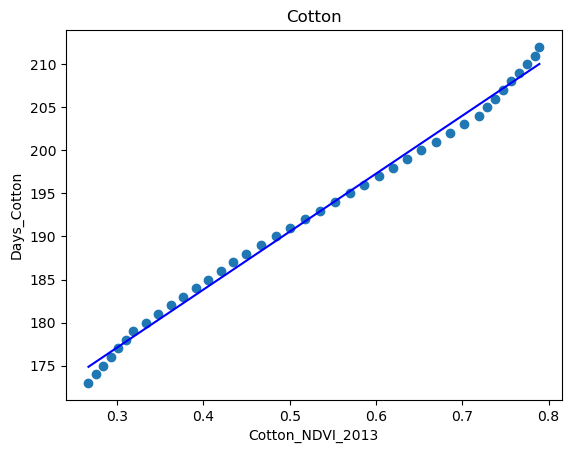

In [80]:
%matplotlib inline
plt.xlabel('Cotton_NDVI_2013',fontsize=10)
plt.ylabel('Days_Cotton',fontsize=10)
plt.scatter(df.Cotton_NDVI_2013,df.Days_Cotton)
plt.title("Cotton")
plt.plot(df.Cotton_NDVI_2013,reg_cotton.predict(df[['Cotton_NDVI_2013']].values),color='blue')

In [82]:
from itertools import chain
y_bar = []
items = [];
y = df[['Cotton_NDVI_2013']].to_numpy()
y = y.flatten() #covert 2d to 1d
for item in y:
    y_bar.append(reg_cotton.predict([[item]]))

y_bar = list(chain.from_iterable(y_bar)) #covert 2d to 1d
y_bar = np.array(y_bar)

linear_regression_errors['cotton'] = calculateMSE(df[['Days_Cotton']].to_numpy(),y_bar)

The Mean Square Error is:  [0.72290773]


## 1.3) Compare Errors

In [91]:
print("Normal Equation Errors")
for x in normal_equation_errors:
    print(x , " " , normal_equation_errors[x])

print("Linear Regression Errors")
for x in linear_regression_errors:
    print(x , " " , linear_regression_errors[x])


Normal Equation Errors
corn   2.058913119486288
cotton   0.7229077337074801
Linear Regression Errors
corn   [2.05891312]
cotton   [0.72290773]


## 2) Estimate EVI and MSAVI from NDVI by using curve fitting in 2013 

In [92]:
Corn_NDVI_2013_b = np.c_[np.ones((40, 1)), Corn_NDVI_2013] # add x0 = 1 to each instance

In [170]:
normal_equation_errors={
    'Corn_NDVI_2013-Corn_EVI_2013':0,
    'Corn_NDVI_2013-Corn_MSAVI_2013':0, 
    'Cotton_NDVI_2013-Cotton_EVI_2013':0,   
    'Cotton_NDVI_2013-Cotton_MSAVI_2013':0,   
}

linear_regression_errors={
    'Corn_NDVI_2013-Corn_EVI_2013':0,
    'Corn_NDVI_2013-Corn_MSAVI_2013':0, 
    'Cotton_NDVI_2013-Cotton_EVI_2013':0,   
    'Cotton_NDVI_2013-Cotton_MSAVI_2013':0,   
}

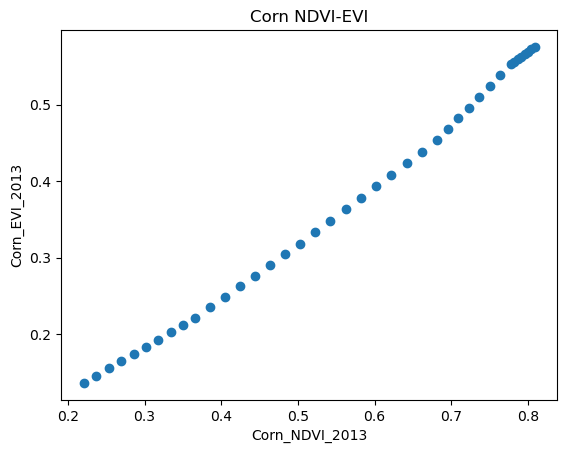

In [171]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013')
plt.ylabel('Corn_EVI_2013')
plt.title("Corn NDVI-EVI")
plt.scatter(df[['Corn_NDVI_2013']],df[['Corn_EVI_2013']])

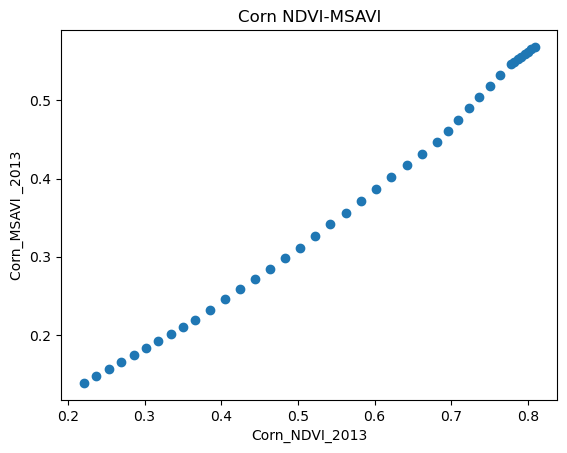

In [172]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013')
plt.ylabel('Corn_MSAVI _2013')
plt.title("Corn NDVI-MSAVI")
plt.scatter(df[['Corn_NDVI_2013']],df[['Corn_MSAVI_2013']])

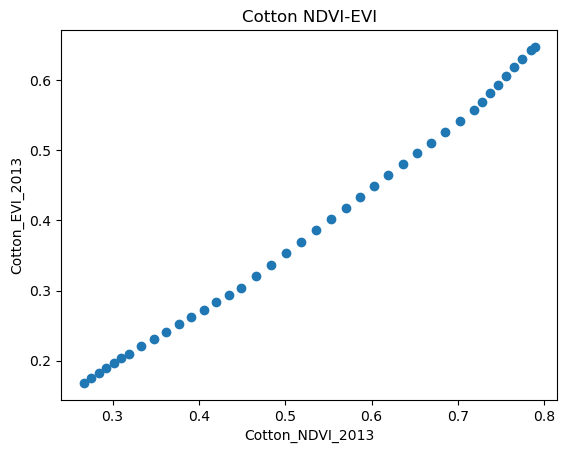

In [173]:
%matplotlib inline
plt.xlabel('Cotton_NDVI_2013')
plt.ylabel('Cotton_EVI_2013')
plt.title("Cotton NDVI-EVI")
plt.scatter(df[['Cotton_NDVI_2013']],df[['Cotton_EVI_2013']])

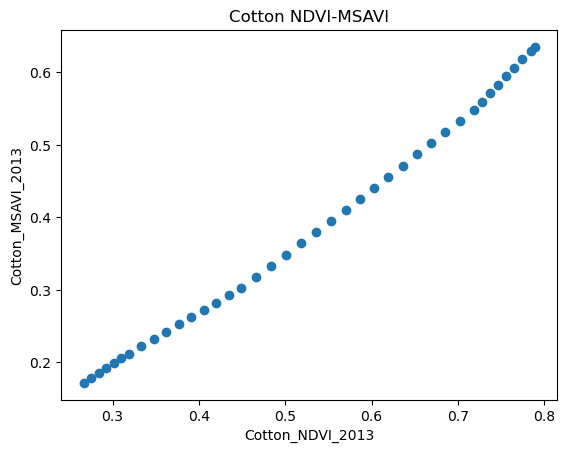

In [174]:
%matplotlib inline
plt.xlabel('Cotton_NDVI_2013')
plt.ylabel('Cotton_MSAVI_2013')
plt.title("Cotton NDVI-MSAVI")
plt.scatter(df[['Cotton_NDVI_2013']],df[['Cotton_MSAVI_2013']])

In [175]:
X_b = np.c_[np.ones((40, 1)), Corn_NDVI_2013] # add x0 = 1 to each instance
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(df['Corn_EVI_2013'])
w_estimate

array([-0.05304527,  0.76248822])

In [176]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_estimate)
y_predict

array([-0.05304527,  1.47193117])

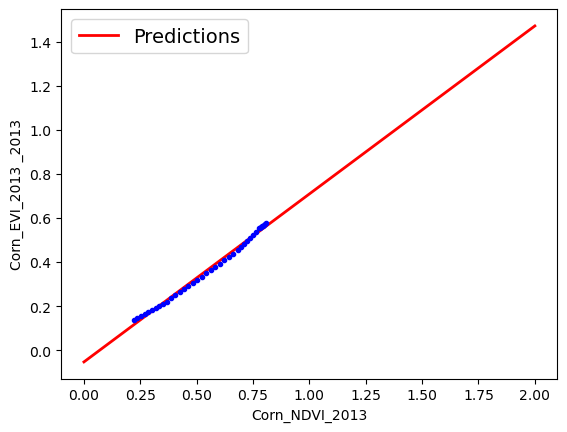

In [177]:
plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel('Corn_NDVI_2013')
plt.ylabel('Corn_EVI_2013 _2013')
plt.plot(Corn_NDVI_2013, df['Corn_EVI_2013'], "b.")
plt.show()

In [178]:
y_bar = [];
for item in Corn_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['Corn_NDVI_2013-Corn_EVI_2013'] = calculateMSE(df['Corn_EVI_2013'],y_bar)

The Mean Square Error is:  0.00011763858889321033


In [179]:
X_b = np.c_[np.ones((40, 1)), Corn_NDVI_2013] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(df['Corn_MSAVI_2013'])
theta_best

array([-0.05010548,  0.74867534])

In [180]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([-0.05010548,  1.4472452 ])

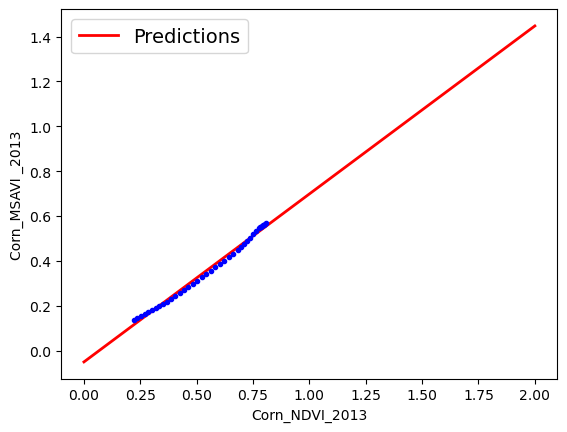

In [181]:
plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions")
plt.xlabel('Corn_NDVI_2013')
plt.ylabel('Corn_MSAVI _2013')
plt.legend(loc="upper left", fontsize=14)
plt.plot(Corn_NDVI_2013, df['Corn_MSAVI_2013'], "b.")
plt.show()

In [182]:
y_bar = [];
for item in Corn_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['Corn_NDVI_2013-Corn_MSAVI_2013'] = calculateMSE(df['Corn_MSAVI_2013'],y_bar)

The Mean Square Error is:  0.00017976036942051512


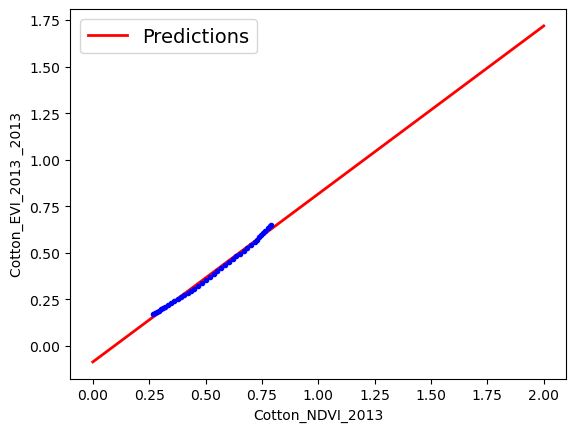

In [183]:
X_b = np.c_[np.ones((40, 1)), Cotton_NDVI_2013] # add x0 = 1 to each instance
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(df['Cotton_EVI_2013'])
w_estimate


X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_estimate)
y_predict

plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel('Cotton_NDVI_2013')
plt.ylabel('Cotton_EVI_2013 _2013')
plt.plot(Cotton_NDVI_2013, df['Cotton_EVI_2013'], "b.")
plt.show()


In [184]:
y_bar = [];
for item in Cotton_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['Cotton_NDVI_2013-Cotton_EVI_2013'] =  calculateMSE(df['Cotton_EVI_2013'],y_bar)

The Mean Square Error is:  0.00011239306212847473


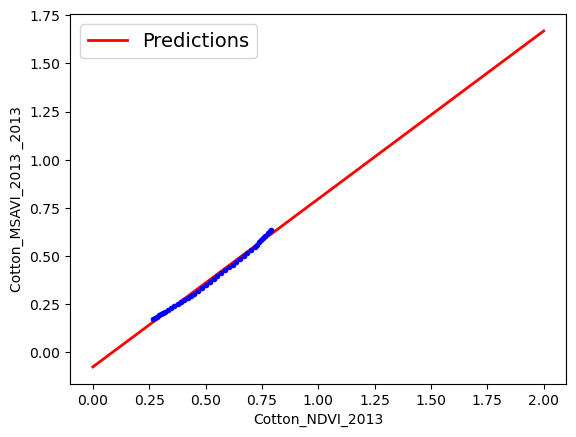

In [185]:
X_b = np.c_[np.ones((40, 1)), Cotton_NDVI_2013] # add x0 = 1 to each instance
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(df['Cotton_MSAVI_2013'])
w_estimate


X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(w_estimate)
y_predict

plt.plot(X_new, y_predict, "r-",linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel('Cotton_NDVI_2013')
plt.ylabel('Cotton_MSAVI_2013 _2013')
plt.plot(Cotton_NDVI_2013, df['Cotton_MSAVI_2013'], "b.")
plt.show()

In [186]:
y_bar = [];
for item in Cotton_NDVI_2013:
    val = w_estimate[0] + item *  w_estimate[1]
    y_bar.append(val)
normal_equation_errors['Cotton_NDVI_2013-Cotton_MSAVI_2013'] = calculateMSE(df['Cotton_MSAVI_2013'],y_bar)

The Mean Square Error is:  0.00011713595422549198


## 2.1) LinerRegression

In [151]:
reg_evi_2013 = linear_model.LinearRegression()
reg_msavi_2013 = linear_model.LinearRegression()

Instead of fitting the model with a data in a dataframe, we use only the values to predict to avoid warnings.

In [152]:
reg_evi_2013.fit(df[['Corn_NDVI_2013']].values,df['Corn_EVI_2013'].values) # train the linear regression data 
reg_msavi_2013.fit(df[['Corn_NDVI_2013']].values,df['Corn_MSAVI_2013'].values) # train the linear regression data 

LinearRegression()

To compare actual to predicted values we set it them to an array and calculate MSE

In [153]:
from itertools import chain
y_bar = []
items = [];
y = df[['Corn_NDVI_2013']].to_numpy()
y = y.flatten() #covert 2d to 1d
for item in y:
    y_bar.append(reg_evi_2013.predict([[item]]))

y_bar = list(chain.from_iterable(y_bar)) #covert 2d to 1d
y_bar = np.array(y_bar)

calculateMSE(y,y_bar)
print(type(y_bar))

The Mean Square Error is:  0.03625086032198451
<class 'numpy.ndarray'>


In [154]:
reg_msavi_2013.predict([[0.4]])

array([0.24936465])

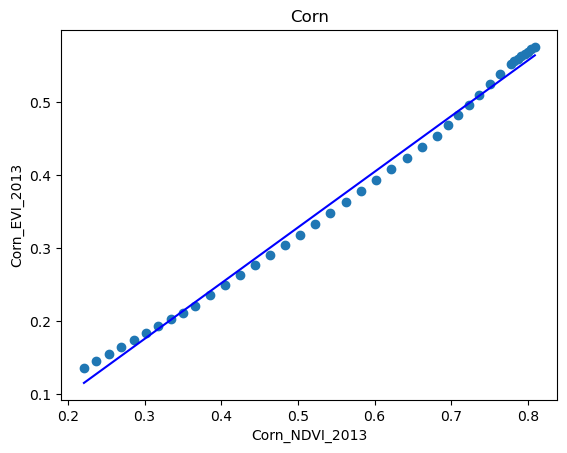

In [156]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.ylabel('Corn_EVI_2013',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Corn_EVI_2013)
plt.title("Corn")
plt.plot(df.Corn_NDVI_2013.values,reg_evi_2013.predict(df[['Corn_NDVI_2013']].values),color='blue')

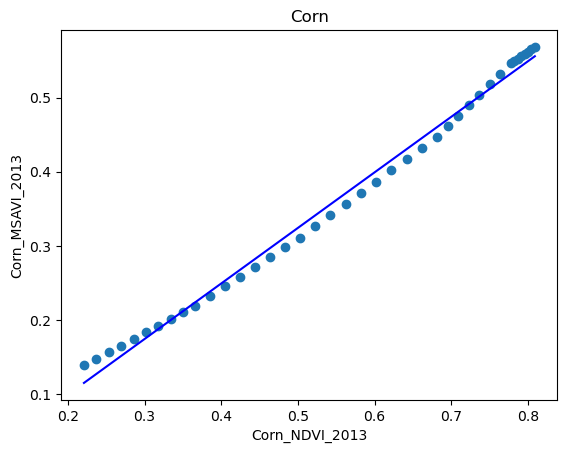

In [276]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.ylabel('Corn_MSAVI_2013',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Corn_MSAVI_2013)
plt.title("Corn")
plt.plot(df.Corn_NDVI_2013,reg_msavi_2013.predict(df[['Corn_NDVI_2013']].values),color='blue')

In [157]:
y_bar = []
items = [];
y = df[['Corn_NDVI_2013']].to_numpy()
y = y.flatten() #covert 2d to 1d
for item in y:
    y_bar.append(reg_msavi_2013.predict([[item]]))

y_bar = list(chain.from_iterable(y_bar)) #covert 2d to 1d
y_bar = np.array(y_bar)

calculateMSE(y,y_bar)

The Mean Square Error is:  0.03826992070927523


0.03826992070927523

### 3) Estimate 2014 NDVI, EVI, and MSAVI values from 2013’s NDVI curve data by using curve fitting.

In [238]:
reg_evi_corn_2014 = linear_model.LinearRegression()
reg_msavi_corn_2014 = linear_model.LinearRegression()
reg_ndvi_corn_2014 = linear_model.LinearRegression()

In [260]:
reg_evi_corn_2014.fit(df[['Corn_NDVI_2013']].values,df['Corn_EVI_2014']) # train the linear regression data 
reg_msavi_corn_2014.fit(df[['Corn_NDVI_2013']].values,df['Corn_MSAVI_2014'].values) # train the linear regression data 
reg_ndvi_corn_2014.fit(df[['Corn_NDVI_2013']].values,df['Corn_NDVI_2014'].values)

LinearRegression()

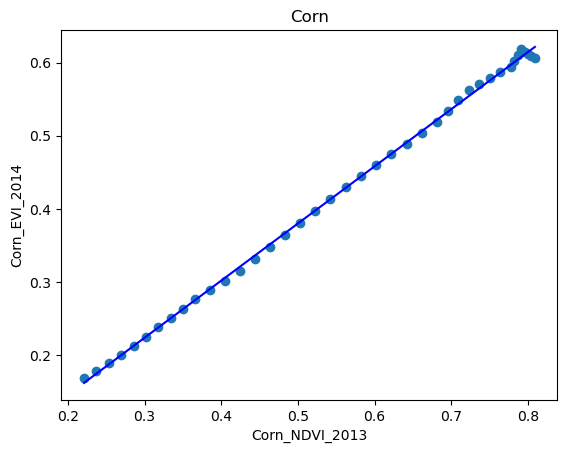

In [261]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.ylabel('Corn_EVI_2014',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Corn_EVI_2014)
plt.title("Corn")
plt.plot(df['Corn_NDVI_2013'].values,reg_evi_corn_2014.predict(df[['Corn_NDVI_2013']].values),color='blue')

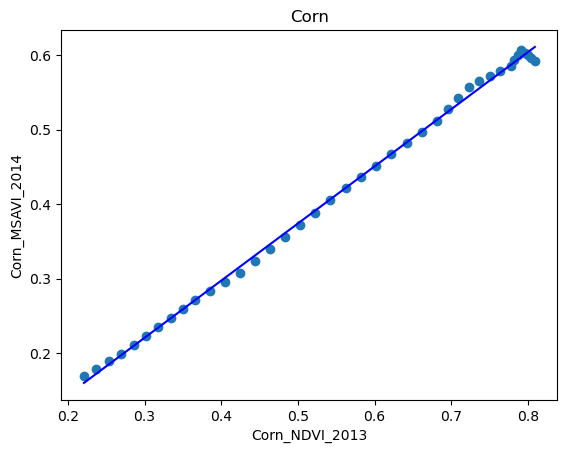

In [262]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.ylabel('Corn_MSAVI_2014',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Corn_MSAVI_2014)
plt.title("Corn")
plt.plot(df.Corn_NDVI_2013,reg_msavi_corn_2014.predict(df[['Corn_NDVI_2013']].values),color='blue')

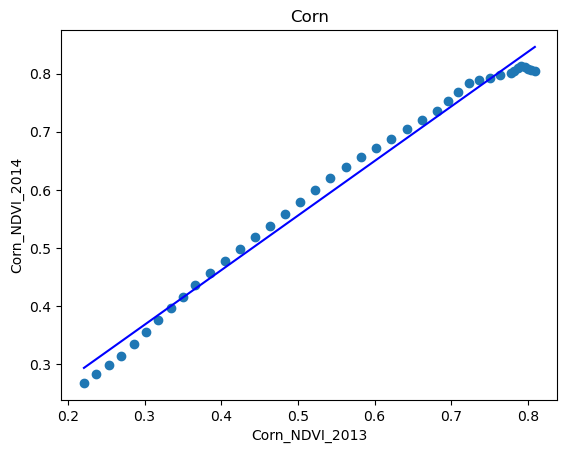

In [265]:
%matplotlib inline
plt.xlabel('Corn_NDVI_2013',fontsize=10)
plt.ylabel('Corn_NDVI_2014',fontsize=10)
plt.scatter(df.Corn_NDVI_2013,df.Corn_NDVI_2014)
plt.title("Corn")
plt.plot(df.Corn_NDVI_2013,reg_ndvi_corn_2014.predict(df[['Corn_NDVI_2013']].values),color='blue')